,bevoelkerung,unter_18,zwischen_18_24,zwischen_25_34,zwischen_35_59,zwischen_60_75,ueber_75,ohne_migration,mit_migration,einkommen_je_einwohner,berufliche_absolventen,allgemeine_absolventen,ohne_hpts,mit_hpts,mit_m_htps,gebildet,migration_hintergrund,afd_und_npd
wahlkreis_name,,,,,,,,,,,,,,,,,,
Aachen I,245.9,13.9,14.6,18.3,30.0,13.6,9.6,75.4,24.6,19652,2.6,11.2,5.1,15.4,36.7,42.9,24.6,7.040742
Aachen II,308.0,17.0,7.9,11.1,36.3,16.8,10.9,75.4,24.6,19652,2.6,11.2,5.1,15.4,36.7,42.9,24.6,6.758117
Aalen – Heidenheim,303.8,17.6,8.4,12.0,35.4,15.6,11.0,76.8,23.2,22109,5.2,12.9,4.8,21.2,46.6,27.4,23.2,8.902184
Ahrweiler,246.4,15.8,7.6,10.8,36.5,17.4,11.9,83.9,16.1,22014,2.1,10.2,4.5,21.0,41.4,33.1,16.1,7.605573
Altmark,201.4,14.9,4.8,11.5,37.5,18.8,12.5,97.1,2.9,17755,2.1,8.7,11.0,10.7,49.2,29.1,2.9,7.071790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worms,284.1,17.3,7.8,11.4,37.7,16.4,9.5,79.7,20.3,22393,1.4,10.5,4.7,17.5,45.0,32.8,20.3,14.037190
Wuppertal I,308.6,16.5,8.4,13.1,35.1,15.8,11.2,68.2,31.8,20746,3.3,10.8,6.2,19.0,35.8,39.1,31.8,10.297050
Würzburg,285.3,14.7,9.9,15.0,34.0,15.6,10.7,83.7,16.3,23105,4,9.4,6.2,15.9,44.5,33.4,16.3,10.313125


-0.006299237973865608


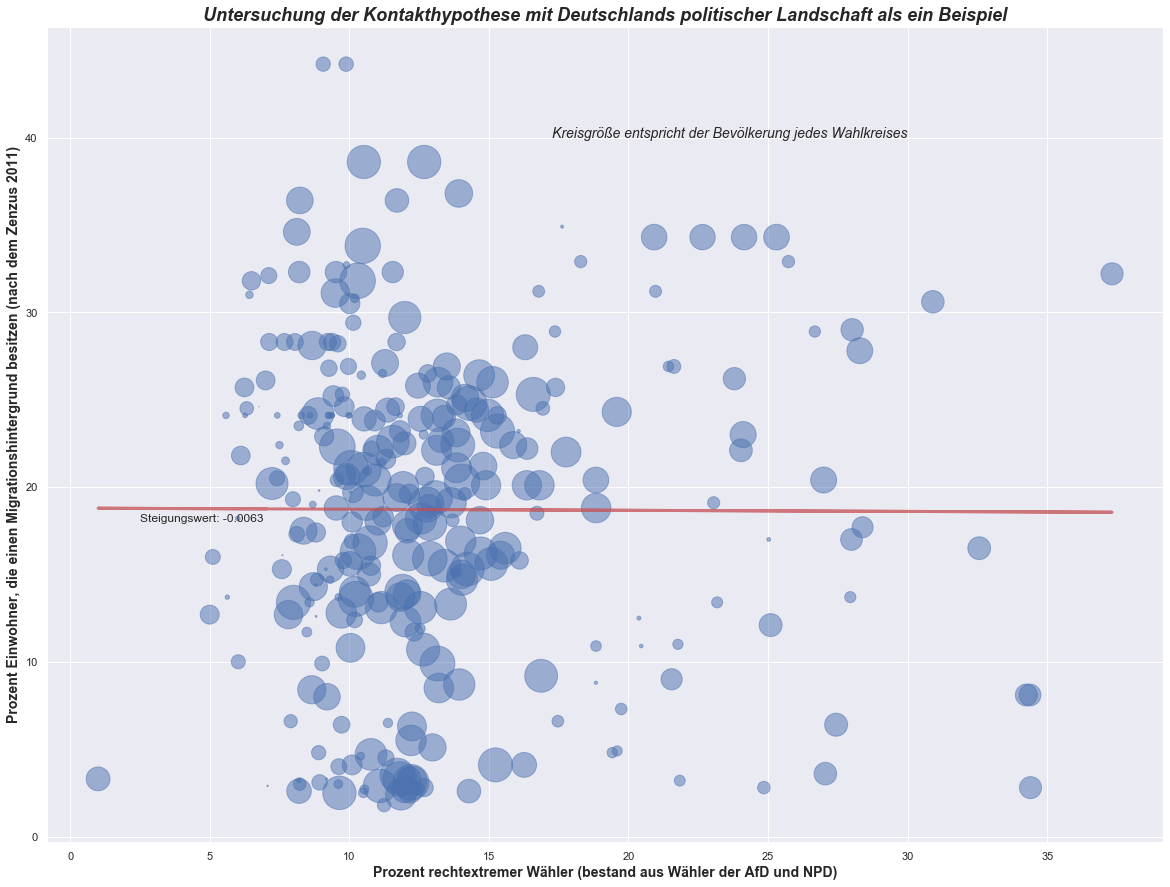

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.lines as mlines


data = pd.read_excel(r'/Users/kristerlansing/Documents/strukturdaten_wahlkreise_2017.xlsx',index_col=0)
#demographische information in wahlkreis, alter, migration, einkommen, bildungsniveau

wahlkreis=pd.DataFrame(data)
wahlkreis=wahlkreis.sort_values('wahlkreis_name',axis=0)




#print("Der durchschnittliche Bevölkerung von allen Wahlkreisen ist %.2f" % (pop))

stimmen_daten = pd.read_excel(r'/Users/kristerlansing/Desktop/wahlkreise_stimmen.xlsx', sheet_name= 'raffiniert', index_col=0)
stimmen_je_partei=pd.DataFrame(stimmen_daten)
total_zu_wk=stimmen_je_partei[['total_zs']]
"""parties that are considered right wing are afd and npd"""


    

wahlkreis['migration_hintergrund'] = wahlkreis['mit_migration'] 
mit_migration = wahlkreis['migration_hintergrund']
mit_migration = mit_migration.rename_axis("Zensus 2011, Bevölkerung nach Migrationshintergrund am 09.05.2011 - mit Migrationshintergrund (%)")
#bevölkerung 
pop_df = pd.DataFrame(wahlkreis['bevoelkerung'])
#MIN 197.6 AND MAX 377.4
#print('MIN:', pop_df.min(), 'MAX:', pop_df.max())
cut_bladee = pd.cut(pop_df['bevoelkerung'], [195, 255, 315, 385], labels=['>255 tausend', 'zwischen 255 und 325 tausend', 'unter 385 tausend'], include_lowest=True)
c_b = cut_bladee.values
#for x in cut_bladee:
    
pop_df['sortiert'] = cut_bladee
sortiert = pop_df['sortiert']
s_argument_dots = pop_df['bevoelkerung']
#höchste rechte partei Unterstützer im Land

stimmen_je_partei['rp_total'] = stimmen_je_partei.iloc[:, [7, 9]].sum(axis=1)
afd_und_npd_prozente = (stimmen_je_partei['rp_total'] / stimmen_je_partei['total_zs']) * 100

#two_sig = afd_und_npd_prozente.mean() 
#print(afd_und_npd_prozente.quantile([.25, .5, .75]))


#print('%.2f' % two_sig)






        
wahlkreis['afd_und_npd']= afd_und_npd_prozente 
display(wahlkreis)
afd_und_npd=wahlkreis['afd_und_npd']
afd_und_npd=afd_und_npd.fillna(1)


#figuring out the line of best fit for the trend
np_rechte = np.array(afd_und_npd)
m_m = np.array(mit_migration)
m, b = np.polyfit(np_rechte, m_m, 1)
#denominator = np_rechte.dot(np_rechte) - np_rechte.mean() * np_rechte.sum()

#m = (np_rechte.dot(m_m) - m_m.mean() * np_rechte.mean()) / denominator
#b = (m_m.mean() * np_rechte.dot(np_rechte) - np_rechte.mean() * np_rechte.dot(m_m)) / denominator


y_pred = (m*np_rechte) + (b)

s_s = [n**1.5 for n in range(len(s_argument_dots))]

plt.figure(figsize=(20, 15))
sns.set()
print(m)


#sns.regplot(x=wahlkreis['afd_und_npd'], y=wahlkreis['mit_migration'], scatter=True, fit_reg=True, line_kws={"color":"b","alpha":0.7,"lw":2})
plt.ylabel('Prozent Einwohner, die einen Migrationshintergrund besitzen (nach dem Zenzus 2011)', fontsize=14, fontweight='semibold')
plt.title('Untersuchung der Kontakthypothese mit Deutschlands politischer Landschaft als ein Beispiel', fontsize=18, fontweight='bold', style='italic')
plt.text(30, 40,'Kreisgröße entspricht der Bevölkerung jedes Wahlkreises', fontstyle='italic', fontsize='14', horizontalalignment='right')
plt.text(2.5, 18,'Steigungswert: -0.0063', fontstyle='normal', fontsize='12', horizontalalignment='left')

plt.scatter(afd_und_npd, mit_migration, s=s_s, marker='.', alpha=0.5)
plt.plot(np_rechte, y_pred, 'r', linewidth=3, alpha=0.75)
plt.xlabel('Prozent rechtextremer Wähler (bestand aus Wähler der AfD und NPD)', fontsize=14, fontweight='semibold')
plt.title('Untersuchung der Kontakthypothese mit Deutschlands politischer Landschaft als ein Beispiel', fontsize=18, fontweight='bold', style='italic')
#plt.yticks(labels=['10%', '20%', '30%', '40%'], fontsize=12, fontweight='normal')

plt.show()


In [ ]:


s_argument_dots = np.array(pop_df["bevoelkerung"])
s_argument_dots=s_argument_dots.astype(int)
